# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [0]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [0]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [14]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [0]:
sampleTrainNum=60000
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sampleTrainNum)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

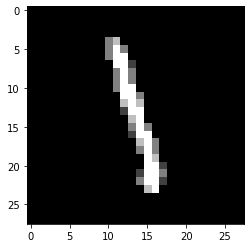

In [48]:
# The rest of columns are pixels
pixels = X_train[0]
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()

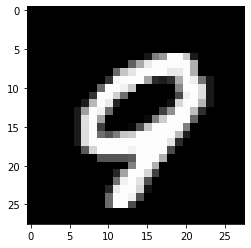

In [49]:
# The rest of columns are pixels
pixels = X_train[42]
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [63]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
slm = linear_model.SGDClassifier(loss='log')
slm.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_predNaiveBayes = naiveBayes.predict(X_train)
y_predSml = slm.predict(X_train)
y_predRf = rf.predict(X_train)

In [67]:
print("Naive Bayes Accuracy:", accuracy_score(y_train, y_predNaiveBayes))
confusion_matrix(y_train, y_predNaiveBayes)

Naive Bayes Accuracy: 0.5559166666666666


array([[5349,   11,   29,   14,   11,   11,  171,    6,  200,  105],
       [   3, 6395,   16,   25,    2,    7,   76,    2,  156,   71],
       [ 552,  173, 1736,  398,   21,   15, 1529,   16, 1385,   97],
       [ 398,  329,   58, 2146,    9,   12,  325,   43, 2160,  678],
       [ 164,   48,   49,   31,  928,   31,  571,   23, 1206, 2876],
       [ 660,  149,   30,  117,   30,  256,  306,   16, 3272,  593],
       [  59,  113,   31,    2,    5,   20, 5510,    0,  120,    8],
       [  29,   49,    8,   52,   42,    5,   21, 1851,  204, 4007],
       [  99,  784,   27,   47,   17,   25,  101,   10, 3584, 1151],
       [  36,   47,   14,   10,   27,    2,    4,   80,  103, 5600]])

In [68]:
print("Simple linear model Accuracy:", accuracy_score(y_train, y_predSml))
confusion_matrix(y_train, y_predSml)

Simple linear model Accuracy: 0.8812


array([[5785,    1,   37,   20,    5,    9,    2,    6,   19,   23],
       [   0, 6566,   68,    7,    6,   15,    3,   12,   10,   66],
       [  47,   16, 5587,   73,   47,   25,   15,   56,   40,   16],
       [  16,   14,  358, 5498,   15,  100,   12,   45,   17,   83],
       [  18,   12,   40,   14, 5331,   48,   11,   69,   38,  346],
       [  61,   29,  173,  465,   56, 4396,   41,   34,   65,  109],
       [ 109,   19,  434,   21,   56,  163, 5034,    8,   14,   10],
       [  13,    6,   83,   28,   43,   14,    5, 5814,    6,  256],
       [  50,  112,  569,  614,   18,  520,   11,   66, 3562,  323],
       [  37,   14,   39,  105,  105,   51,    1,  260,   12, 5299]])

In [69]:
print("Random Forest Accuracy:", accuracy_score(y_train, y_predRf))
confusion_matrix(y_train, y_predRf)

Random Forest Accuracy: 1.0


array([[5907,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6753,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5922,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6158,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5927,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5429,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5868,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6268,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5845,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5923]])

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [70]:
y_predNaiveBayesTest = naiveBayes.predict(X_test)
y_predSmlTest = slm.predict(X_test)
y_predRfTest = rf.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_predNaiveBayesTest))
print("Simple linear model Accuracy:", accuracy_score(y_test, y_predSmlTest))
print("Random Forest Accuracy:", accuracy_score(y_test, y_predRfTest))

Naive Bayes Accuracy: 0.5607
Simple linear model Accuracy: 0.8692
Random Forest Accuracy: 0.9708


In [72]:
print("Naive Bayes F-Measure:", f1_score(y_test, y_predNaiveBayesTest,average=None))
print("Simple linear model F-Measure:", f1_score(y_test, y_predSmlTest,average=None))
print("Random Forest F-Measure:", f1_score(y_test, y_predRfTest,average=None))

Naive Bayes F-Measure: [0.80484522 0.85934333 0.45048815 0.47455296 0.25       0.06309148
 0.77333333 0.44267054 0.39247312 0.54545455]
Simple linear model F-Measure: [0.94485115 0.95813134 0.83340327 0.83131948 0.8992601  0.81609195
 0.9126522  0.9082172  0.71294559 0.83826248]
Random Forest F-Measure: [0.98452322 0.98667851 0.96130536 0.95247828 0.9726104  0.97058824
 0.98467622 0.97560976 0.95545315 0.96213592]
